In [1]:
#!pip install torch

In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

## Знакомство с данными и их предобработка

In [3]:
# Чтение csv файла и формирование датафрейма.
path = os.path.join(os.getcwd(), 'train_6.csv')
data = pd.read_csv(path, sep=',', dtype = np.float32)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Информация о типах данных, используемой памяти, кол-ве строк и колонок.
# 42000 строк, 785 колонок, числовые типы данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: float32(785)
memory usage: 125.8 MB


In [5]:
# Проверка заполнения пропущенных значений. Пропущенных значений в колонках нет.
print(data.isnull().sum().sum())
data.isna().sum().sum()

0


0

In [6]:
# Проверка дублирующих строк. Дублирующих строк нет.
data.duplicated().sum()

0

In [7]:
# Чтение csv файла и формирование тестового набора.
path_test = os.path.join(os.getcwd(), 'test_6.csv')
test = pd.read_csv(path_test, sep=',', dtype = np.float32)
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Информация о типах данных, используемой памяти, кол-ве строк и колонок.
# 28000 строк, 784 колонки, числовые типы данных.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: float32(784)
memory usage: 83.7 MB


In [9]:
# Проверка заполнения пропущенных значений. Пропущенных значений в колонках нет.
print(test.isnull().sum().sum())
test.isna().sum().sum()

0


0

In [10]:
# Проверка дублирующих строк. Дублирующих строк нет.
test.duplicated().sum()

0

Файлы данных train.csv и test.csv содержат изображения нарисованных от руки цифр от нуля до девяти.  
Каждое изображение имеет высоту 28 пикселей и ширину 28 пикселей, всего 784 пикселя. С каждым пикселем связано одно значение пикселя, указывающее яркость или темноту этого пикселя, причем более высокие числа означают темнее. Это значение пикселя представляет собой целое число от 0 до 255 включительно.  
Набор обучающих данных (train.csv) содержит 785 столбцов. Первый столбец, называемый label, представляет собой цифру, нарисованную пользователем. Остальные столбцы содержат значения пикселей связанного изображения.  
Каждый столбец пикселей в обучающем наборе имеет имя, например pixelx, где x — целое число от 0 до 783 включительно. Чтобы найти этот пиксель на изображении, предположим, что мы разложили x как x = i * 28 + j, где i и j — целые числа от 0 до 27 включительно. Затем pixelx находится в строке i и столбце j матрицы 28 x 28 (индексируется нулем).  
Например, pixel31 указывает пиксель, который находится в четвертом столбце слева и во второй строке сверху, как на приведенной ниже ascii-диаграмме.  
Визуально, если опустить префикс «пиксель», пиксели составляют изображение следующим образом: 
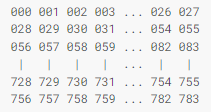
Набор тестовых данных (test.csv) аналогичен обучающему набору, за исключением того, что он не содержит столбца label.

In [11]:
# Описательная статистика для учебного и тестового наборов.
print(data.describe())
test.describe()

              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887756      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312477      4.632941   
min        0.0      0.0      0

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.471869,3.616324,1.813393,1.205182,0.807461,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


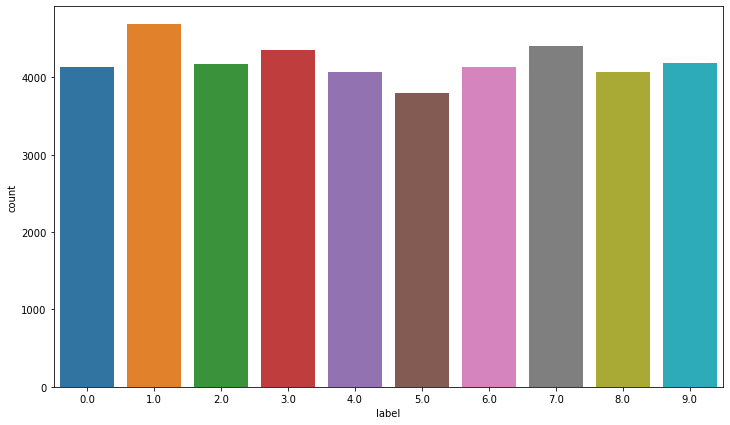

In [12]:
# Посмотрим на распределение классов по колонке Label. Больше 1, меньше 5.
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='label')
plt.show()

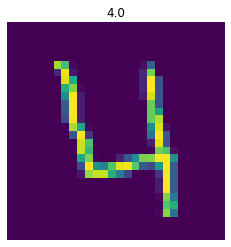

In [13]:
# Посмотрим на изображение одной из цифр
plt.imshow(data.iloc[:,1:].values[3].reshape(28,28))
plt.axis('off')
plt.title(str(data['label'][3]))
plt.show()

In [14]:
# Запишем признаки в переменную X (+приведем значения от 0 до 1), целевой признак в переменную y.
X = data.iloc[:, 1:].values/255
y = data['label'].values

In [15]:
# Разделим датафрейм на обучающую и валидационную выборки, задаем пропорцию классов при разделении на обучающий и проверяющий
# датасеты с помощью параметра stratify.
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=42)

In [16]:
# Создаем тензоры для обучающей выборки.
X_train_torch = torch.from_numpy(X_train)
y_train_torch = torch.from_numpy(y_train).type(torch.LongTensor)
# Создаем тензоры для валидационной выборки.
X_val_torch = torch.from_numpy(X_val)
y_val_torch = torch.from_numpy(y_val).type(torch.LongTensor)

In [17]:
# Задаем размер batch, iterations, epochs
batch_size = 100
n_iters = 3000
num_epochs = n_iters/(len(X_train_torch)/batch_size)
num_epochs = int(num_epochs)
# Создаем TensorDataset для тензоров обучающей и валидационной выборок.
train_torch_ds = torch.utils.data.TensorDataset(X_train_torch,y_train_torch)
val_torch_ds = torch.utils.data.TensorDataset(X_val_torch,y_val_torch)
# Создаем DataLoader для TensorDataset тензоров обучающей и валидационной выборок.
train_loader = torch.utils.data.DataLoader(train_torch_ds, batch_size = batch_size, shuffle = True)
val_loader = torch.utils.data.DataLoader(val_torch_ds, batch_size = batch_size, shuffle = False)

## Обучение моделей и оценка качества

In [18]:
# Создаем для классификации полносвязную нейронную модель.
class DenceNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DenceNetModel, self).__init__()
        # Первый полносвязный слой
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        # Функция активации, нелинейная
        self.activation = nn.ReLU()
        # Второй полносвязный слой
        self.linear2 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        # Полносвязный слой
        out = self.linear1(x)
        # Нелинейная функция
        out = self.activation(out)
        # Полносвязный слой
        out = self.linear2(out)
        return out

# Задаем размерность входящих данных, скрытого слоя, выходного слоя.
input_dim = 28*28 # размер изображения  px*px
hidden_dim = 100
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# Создаем экземпляр класса модели.
model_DNN = DenceNetModel(input_dim, hidden_dim, output_dim)
# Cross Entropy Loss, логистическая функция в pytorch в loss function
error_DNN = nn.CrossEntropyLoss()
# SGD Optimizer 
learning_rate = 0.1
optimizer_DNN = torch.optim.SGD(model_DNN.parameters(), lr=learning_rate)

In [19]:
# Создаем Convolution Neural Network модель.
class CNNModel(nn.Module):
    def __init__(self, out_1, out_2):
        super(CNNModel, self).__init__()        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)        
        # Fully connected 1
        self.fc1 = nn.Linear(out_2*4*4, 10)     
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)        
        # Max pool 1
        out = self.maxpool1(out)        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)        
        # Max pool 2 
        out = self.maxpool2(out)        
        # flatten
        out = out.view(out.size(0), -1)
        # Linear function (readout)
        out = self.fc1(out)
        return out

# Делаем экземпляр CNN
out_1 = 16
out_2 = 32
model_CNN = CNNModel(out_1, out_2)
# Cross Entropy Loss 
error_CNN = nn.CrossEntropyLoss()
# SGD Optimizer
optimizer_CNN = torch.optim.SGD(model_CNN.parameters(), lr=learning_rate)

In [20]:
# Функция обучения модели
def train_model(param_view, optimizer, model, error):
    iteration = 0
    loss_list = []
    iteration_list = []
    accuracy_list = []
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):       
            # Спрямляем изображение в вектор
            images = images.view(*param_view)      
            # Затираем прошлые градиенты, чтобы они не аккумулировались
            optimizer.zero_grad()     
            # Forward propagation
            outputs = model(images)       
            # Вычисляем softmax и cross entropy loss
            loss = error(outputs, labels)      
            # Здесь происходит вычисление градиентов для параметров модели, которые переданы в оптимизатор
            loss.backward()        
            # Здесь происходит обновление параметров
            optimizer.step()        
            iteration += 1
            # Предсказание и вычисление метрики
            if iteration % 50 == 0:
                correct = 0
                total = 0
                # Модель переводим в режим evalution (inference)
                model.eval()
                # Поскольку нам не нужно вычисление градиентов, мы используем менеджер контекста
                with torch.no_grad():
                # Предсказание validation dataset
                    for images, labels in val_loader: 
                        images_val = images.view(*param_view)                
                        # Forward propagation
                        outputs = model(images_val)                
                        # Получаем прогнозы от максимального значения
                        predicted = torch.max(outputs.data, 1)[1]                
                        # Подсчитываем общее количество объектов в валидационной выборке
                        total += len(labels)                
                        # Общее количество верно классифицированных объектов
                        correct += (predicted == labels).sum() 
                    model.train() # Модель переводим в режим train
                # Используем метрику accuracy поскольку баланс классов от 0 до 9 имеется.
                accuracy = 100*correct/float(total)
                # Храним loss, iteration, accuracy.
                loss_list.append(loss.data)
                iteration_list.append(iteration)
                accuracy_list.append(accuracy)
            if iteration % 100 == 0:
                # Вывод номера итерации, значения loss и accuracy.
                print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(iteration, loss.data, accuracy))
    return [iteration_list, loss_list, accuracy_list]

In [21]:
# Функции отображения графиков
def plot_loss(train_model_item, name):
    plt.plot(train_model_item[0],train_model_item[1])
    plt.xlabel('Number of iteration')
    plt.ylabel('Loss')
    plt.title(f'Loss and Number of iteration in {name}')
    plt.show()
def plot_accuracy(train_model_item, name):
    plt.plot(train_model_item[0],train_model_item[2], color='red')
    plt.xlabel('Number of iteration')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy and Number of iteration in {name}')
    plt.show()

In [22]:
# Обучение модели DNN
train_model_DNN = train_model([-1, 28*28], optimizer_DNN, model_DNN, error_DNN)

Iteration: 100  Loss: 0.5586406588554382  Accuracy: 84.83809661865234%
Iteration: 200  Loss: 0.327971875667572  Accuracy: 88.46666717529297%
Iteration: 300  Loss: 0.37737759947776794  Accuracy: 89.38095092773438%
Iteration: 400  Loss: 0.40936192870140076  Accuracy: 90.25714111328125%
Iteration: 500  Loss: 0.2096778303384781  Accuracy: 90.46666717529297%
Iteration: 600  Loss: 0.18379417061805725  Accuracy: 91.26667022705078%
Iteration: 700  Loss: 0.3333941400051117  Accuracy: 91.4952392578125%
Iteration: 800  Loss: 0.29659873247146606  Accuracy: 92.01905059814453%
Iteration: 900  Loss: 0.2761233150959015  Accuracy: 92.19999694824219%
Iteration: 1000  Loss: 0.19406738877296448  Accuracy: 92.47618865966797%
Iteration: 1100  Loss: 0.16949178278446198  Accuracy: 92.92381286621094%
Iteration: 1200  Loss: 0.21098260581493378  Accuracy: 92.70476531982422%
Iteration: 1300  Loss: 0.19500762224197388  Accuracy: 93.13333129882812%
Iteration: 1400  Loss: 0.10193274170160294  Accuracy: 93.3809509277

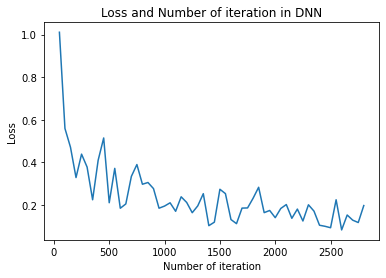

In [23]:
# Отобразим график кол-ва итераций и значений loss function при обучении
plot_loss(train_model_DNN, 'DNN')

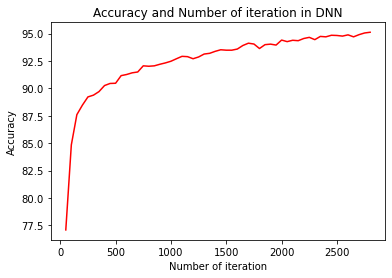

In [24]:
# Отобразим график кол-ва итераций и значений accuracy на валидационной выборке
plot_accuracy(train_model_DNN, 'DNN')

Выше для работы с изображениями была использована довольно простая полносвязная нейронная сеть. Точность такой модели достаточно высока. Тем не менее, полносвязные сети для изображений применять неэффективно. В данном случае картинки достаточно маленькие (размер картинки 28*28 px). В полносвязной модели слишком много параметров для простых задач. Если использовать только полносвязные слои, то: -хотелось бы, чтобы была устойчивость сети к сдвигам, небольшим поворотам, сжатиям и растяжениям; -также хотелось бы как можно меньше параметров. Попробуем применить сверточные нейронные сети.

In [25]:
# Обучение CNN model
train_model_CNN = train_model([100, 1, 28, 28], optimizer_CNN, model_CNN, error_CNN)

Iteration: 100  Loss: 0.24058550596237183  Accuracy: 92.36190795898438%
Iteration: 200  Loss: 0.19834591448307037  Accuracy: 94.5904769897461%
Iteration: 300  Loss: 0.27541035413742065  Accuracy: 93.80952453613281%
Iteration: 400  Loss: 0.06672579795122147  Accuracy: 96.16190338134766%
Iteration: 500  Loss: 0.0526096485555172  Accuracy: 96.54285430908203%
Iteration: 600  Loss: 0.0731104388833046  Accuracy: 96.46666717529297%
Iteration: 700  Loss: 0.05410114675760269  Accuracy: 97.06666564941406%
Iteration: 800  Loss: 0.08698654174804688  Accuracy: 96.63809204101562%
Iteration: 900  Loss: 0.0988684594631195  Accuracy: 97.24761962890625%
Iteration: 1000  Loss: 0.03070211596786976  Accuracy: 97.67619323730469%
Iteration: 1100  Loss: 0.11552238464355469  Accuracy: 97.4190444946289%
Iteration: 1200  Loss: 0.029061803594231606  Accuracy: 97.78095245361328%
Iteration: 1300  Loss: 0.09189591556787491  Accuracy: 97.69523620605469%
Iteration: 1400  Loss: 0.0744343250989914  Accuracy: 97.93333435

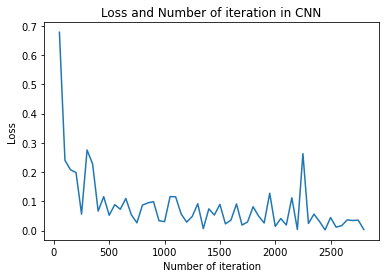

In [26]:
# Отобразим график кол-ва итераций и значений loss function при обучении
plot_loss(train_model_CNN, 'CNN')

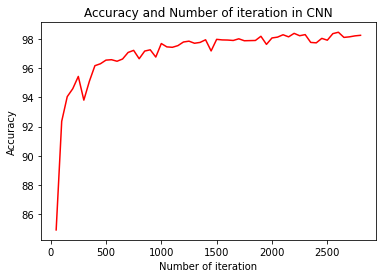

In [27]:
# Отобразим график кол-ва итераций и значений accuracy на валидационной выборке
plot_accuracy(train_model_CNN, 'CNN')

## Валидация на тестовых данных

Точность выше дала модель CNN, используем ее для валидации тестовых данных.

In [28]:
# Готовим тестовые данные для валидации и проверяем на обученной модели CNN.
test_val = (test.values/255).reshape((-1, 1, 28, 28))
with torch.no_grad():
    model_CNN.eval()
    predict = model_CNN(torch.from_numpy(test_val)).argmax(dim=1).numpy()
result = pd.Series(predict, name='Label')

In [29]:
# Формируем фрейм из id изображения и label, сохраняем в csv.
validation_test = pd.concat([pd.Series(range(1, test.shape[0] + 1), name='ImageId'), result], axis=1)
validation_test.to_csv('validation_test_6.csv', index=False)

In [30]:
# Отображаем полученный фрейм с предсказанными классами тестовых данных.
validation_test

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


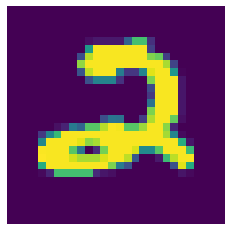

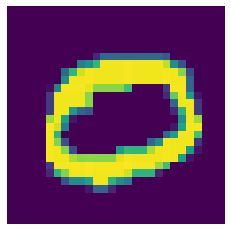

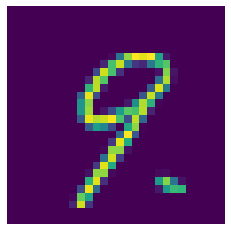

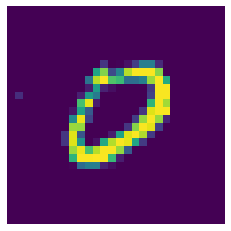

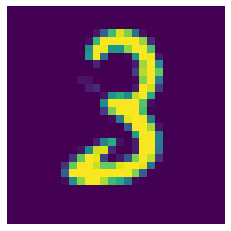

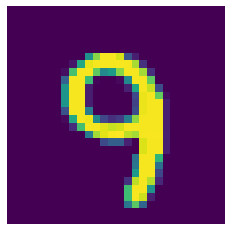

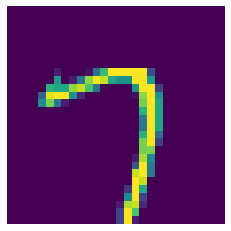

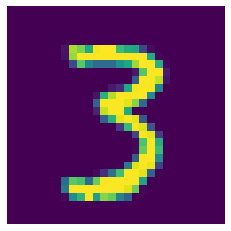

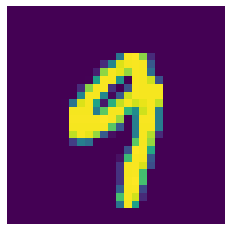

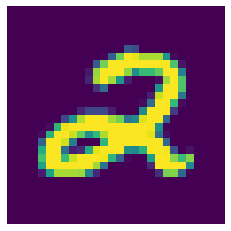

In [31]:
# Отображаем числа первых пяти и последних пяти элементов тестовых данных.
lst = [0, 1, 2, 3, 4, 27995, 27996, 27997, 27998, 27999]
for img in lst:
    plt.imshow(test.values[img].reshape(28,28))
    plt.axis('off')
    plt.show()